In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import pandas as pd
import time
import psutil
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import RidgeClassifier, Perceptron, PassiveAggressiveClassifier


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [16]:
df = pd.read_csv("/content/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv",delimiter="|")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008748 entries, 0 to 1008747
Data columns (total 23 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ts              1008748 non-null  float64
 1   uid             1008748 non-null  object 
 2   id.orig_h       1008748 non-null  object 
 3   id.orig_p       1008748 non-null  float64
 4   id.resp_h       1008748 non-null  object 
 5   id.resp_p       1008748 non-null  float64
 6   proto           1008748 non-null  object 
 7   service         1008748 non-null  object 
 8   duration        1008748 non-null  object 
 9   orig_bytes      1008748 non-null  object 
 10  resp_bytes      1008748 non-null  object 
 11  conn_state      1008748 non-null  object 
 12  local_orig      1008748 non-null  object 
 13  local_resp      1008748 non-null  object 
 14  missed_bytes    1008748 non-null  float64
 15  history         1008748 non-null  object 
 16  orig_pkts       1008748 non-null  fl

# **Renaming the  Data**

In [18]:
df.rename(columns={
    'ts': 'timestamp',
    'uid': 'unique_id',
    'id.orig_h': 'origin_host_ip',
    'id.orig_p': 'origin_host_port',
    'id.resp_h': 'response_host_ip',
    'id.resp_p': 'response_host_port',
    'proto': 'protocol',
    'orig_bytes': 'origin_bytes',
    'resp_bytes': 'response_bytes',
    'conn_state': 'connection_state',
    'local_orig': 'is_local_origin',
    'local_resp': 'is_local_response',
    'orig_pkts': 'origin_packet_count',
    'orig_ip_bytes': 'origin_ip_bytes',
    'resp_pkts': 'response_packet_count',
    'resp_ip_bytes': 'response_ip_bytes',
}, inplace=True)

In [19]:
df['is_local_origin']

,is_local_origin
0,-
1,-
2,-
3,-
4,-
...,...
1008743,-
1008744,-
1008745,-
1008746,-


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008748 entries, 0 to 1008747
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   timestamp              1008748 non-null  float64
 1   unique_id              1008748 non-null  object 
 2   origin_host_ip         1008748 non-null  object 
 3   origin_host_port       1008748 non-null  float64
 4   response_host_ip       1008748 non-null  object 
 5   response_host_port     1008748 non-null  float64
 6   protocol               1008748 non-null  object 
 7   service                1008748 non-null  object 
 8   duration               1008748 non-null  object 
 9   origin_bytes           1008748 non-null  object 
 10  response_bytes         1008748 non-null  object 
 11  connection_state       1008748 non-null  object 
 12  is_local_origin        1008748 non-null  object 
 13  is_local_response      1008748 non-null  object 
 14  missed_bytes      

In [21]:
df["label"]

,label
0,Malicious
1,Malicious
2,Malicious
3,Malicious
4,Malicious
...,...
1008743,Benign
1008744,Benign
1008745,Benign
1008746,Benign


In [22]:
df.describe()

,timestamp,origin_host_port,response_host_port,missed_bytes,origin_packet_count,origin_ip_bytes,response_packet_count,response_ip_bytes
count,1.008748e+06,1.008748e+06,1.008748e+06,1008748.0,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06
mean,1.526075e+09,4.443684e+04,1.609771e+04,0.0,1.496242e+00,8.114562e+01,1.424647e-01,9.049184e+00
std,1.157431e+05,9.660592e+03,1.956280e+04,0.0,1.741176e+00,9.473090e+01,1.850414e+00,1.196776e+02
min,1.525880e+09,3.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.525975e+09,4.373000e+04,2.300000e+01,0.0,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
50%,1.526071e+09,4.376300e+04,8.080000e+03,0.0,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00
75%,1.526174e+09,4.881400e+04,2.818025e+04,0.0,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00
max,1.526283e+09,6.539400e+04,6.553500e+04,0.0,6.000000e+01,2.990000e+03,7.500000e+01,9.415000e+03


# **Converting to Numeric**

In [23]:
numeric_cols = ['duration', 'origin_bytes', 'response_bytes', 'missed_bytes',
                'origin_packet_count', 'origin_ip_bytes', 'response_packet_count', 'response_ip_bytes']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df.isnull().sum()


,0
timestamp,0
unique_id,0
origin_host_ip,0
origin_host_port,0
response_host_ip,0
response_host_port,0
protocol,0
service,0
duration,796300
origin_bytes,796300


# **Fill Missing** **Values**

In [24]:
df[['origin_bytes', 'response_bytes']] = df[['origin_bytes', 'response_bytes']].fillna(0).astype(int)
df[['service', 'history']] = df[['service', 'history']].fillna('unknown')

# **Split Data**

In [25]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

df = df.iloc[1:].reset_index(drop=True)
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour

df.drop('timestamp', axis=1, inplace=True)

df.replace('-', np.nan, inplace=True)
df = df.infer_objects(copy=False)

df.head()


<ipython-input-25-9f850ef3e14b>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True)


,unique_id,origin_host_ip,origin_host_port,response_host_ip,response_host_port,protocol,service,duration,origin_bytes,response_bytes,...,origin_ip_bytes,response_packet_count,response_ip_bytes,tunnel_parents,label,detailed-label,year,month,day,hour
0,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,NaN,NaN,0,0,...,60.0,0.0,0.0,NaN,Malicious,PartOfAHorizontalPortScan,2018,5,9,15
1,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,NaN,NaN,0,0,...,60.0,0.0,0.0,NaN,Malicious,PartOfAHorizontalPortScan,2018,5,9,15
2,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,NaN,2.998796,0,0,...,180.0,0.0,0.0,NaN,Malicious,PartOfAHorizontalPortScan,2018,5,9,15
3,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,NaN,NaN,0,0,...,60.0,0.0,0.0,NaN,Malicious,PartOfAHorizontalPortScan,2018,5,9,15
4,CMBrup3BLXivSp4Avc,192.168.100.103,50244.0,120.210.108.200,23.0,tcp,NaN,NaN,0,0,...,60.0,0.0,0.0,NaN,Malicious,PartOfAHorizontalPortScan,2018,5,9,15


In [26]:
df = df[df['label'].isin(['Malicious', 'Benign'])]
df['label'] = df['label'].map({'Malicious': 1, 'Benign': 0})

In [27]:
df["label"]

,label
0,1
1,1
2,1
3,1
4,1
...,...
1008742,0
1008743,0
1008744,0
1008745,0


In [28]:
df['origin_host_ip'] = df['origin_host_ip'].apply(lambda ip: int(ipaddress.IPv4Address(ip)) if pd.notnull(ip) else 0)
df['response_host_ip'] = df['response_host_ip'].apply(lambda ip: int(ipaddress.IPv4Address(ip)) if pd.notnull(ip) else 0)


# **Checking For Unbalanced Data**

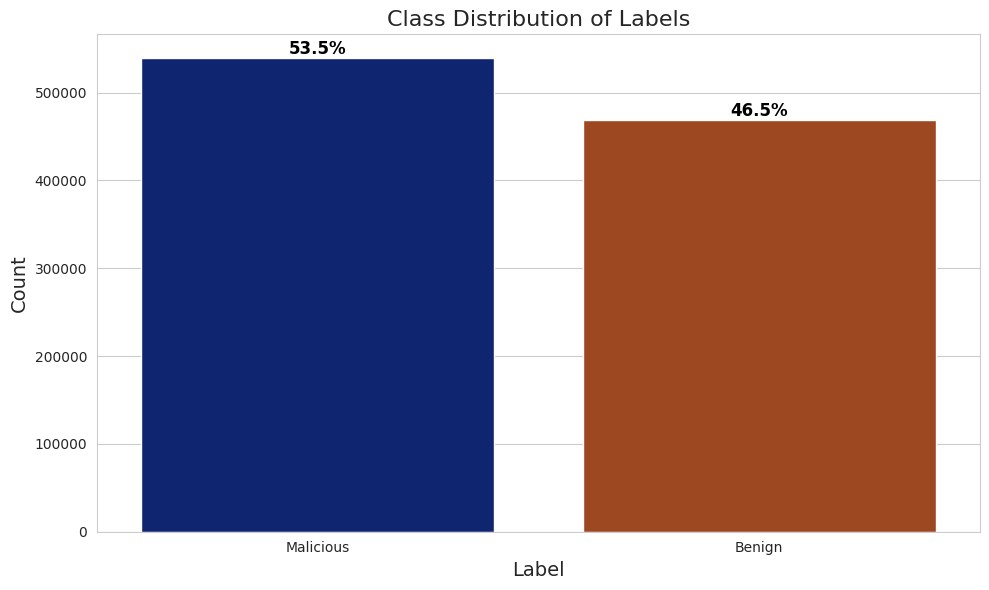

In [29]:
df_cleaned = df[df['label'].isin([0, 1])].replace({'label': {1: 'Malicious', 0: 'Benign'}})
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='label', data=df_cleaned, hue='label', palette="dark", legend=False, order=['Malicious', 'Benign'])
plt.title('Class Distribution of Labels', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)

total = len(df_cleaned)
count_malicious, count_benign = df_cleaned['label'].value_counts(sort=False)
percentage_malicious = f'{100 * count_malicious / total:.1f}%'
percentage_benign = f'{100 * count_benign / total:.1f}%'

ax.annotate(percentage_malicious, (0, count_malicious + count_malicious * 0.02), ha='center', va='center', fontsize=12, color='black', weight='bold')
ax.annotate(percentage_benign, (1, count_benign + count_benign * 0.02), ha='center', va='center', fontsize=12, color='black', weight='bold')

plt.tight_layout()
plt.show()


In [ ]:
print(count_malicious,count_benign)

539472 469275


In [ ]:
df[df.duplicated()]


,unique_id,origin_host_ip,origin_host_port,response_host_ip,response_host_port,protocol,service,duration,origin_bytes,response_bytes,...,origin_ip_bytes,response_packet_count,response_ip_bytes,tunnel_parents,label,detailed-label,year,month,day,hour


# **Checking For Outliers**

In [ ]:
df

,unique_id,origin_host_ip,origin_host_port,response_host_ip,response_host_port,protocol,service,duration,origin_bytes,response_bytes,...,origin_ip_bytes,response_packet_count,response_ip_bytes,tunnel_parents,label,detailed-label,year,month,day,hour
0,CH98aB3s1kJeq6SFOc,3232261223,56305.0,1066799275,23.0,tcp,NaN,NaN,0,0,...,60.0,0.0,0.0,NaN,1,PartOfAHorizontalPortScan,2018,5,9,15
1,C3GBTkINvXNjVGtN5,3232261223,41101.0,1864898353,23.0,tcp,NaN,NaN,0,0,...,60.0,0.0,0.0,NaN,1,PartOfAHorizontalPortScan,2018,5,9,15
2,CDe43c1PtgynajGI6,3232261223,60905.0,2209273747,23.0,tcp,NaN,2.998796,0,0,...,180.0,0.0,0.0,NaN,1,PartOfAHorizontalPortScan,2018,5,9,15
3,CJaDcG3MZzvf1YVYI4,3232261223,44301.0,1529491263,23.0,tcp,NaN,NaN,0,0,...,60.0,0.0,0.0,NaN,1,PartOfAHorizontalPortScan,2018,5,9,15
4,CMBrup3BLXivSp4Avc,3232261223,50244.0,2027056328,23.0,tcp,NaN,NaN,0,0,...,60.0,0.0,0.0,NaN,1,PartOfAHorizontalPortScan,2018,5,9,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008742,CUyBg1WA04SBmf3ah,3232261223,43763.0,282809225,64906.0,udp,NaN,NaN,0,0,...,40.0,0.0,0.0,NaN,0,NaN,2018,5,14,7
1008743,CvaIoX2b9VynuYieBf,3232261223,43763.0,1681520068,39435.0,udp,NaN,NaN,0,0,...,40.0,0.0,0.0,NaN,0,NaN,2018,5,14,7
1008744,CVHrUzIUN0mW5lQsl,3232261223,43763.0,4184045321,26169.0,udp,NaN,NaN,0,0,...,40.0,0.0,0.0,NaN,0,NaN,2018,5,14,7
1008745,CkGlnL2pxzlusrFlLj,3232261223,43763.0,3446122432,18241.0,udp,NaN,NaN,0,0,...,40.0,0.0,0.0,NaN,0,NaN,2018,5,14,7


In [ ]:
# numeric_df = df.select_dtypes(include=[np.number]).fillna(df.mean())

means = df.mean(numeric_only=True)
numeric_df = df.fillna(means).select_dtypes(include='number')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler


columns_with_all_nans = ['tunnel_parents', 'is_local_response', 'is_local_origin']
df_processed = df.drop(columns=columns_with_all_nans)

numeric_columns = df_processed.select_dtypes(include=[np.number]).columns.tolist()

df_processed[numeric_columns] = df_processed[numeric_columns].replace([np.inf, -np.inf], np.nan)
df_processed[numeric_columns] = df_processed[numeric_columns].fillna(df_processed[numeric_columns].median())

iso_forest = IsolationForest(contamination=0.01, random_state=42)
df_processed['outlier_iso'] = iso_forest.fit_predict(df_processed[numeric_columns])

outlier_counts = df_processed['outlier_iso'].value_counts()
print("Outliers before scaling:\n", outlier_counts)

outliers_df = df_processed[df_processed['outlier_iso'] == -1]
print("Outliers detected:\n", outliers_df)

scaler = RobustScaler()
df_processed[numeric_columns] = scaler.fit_transform(df_processed[numeric_columns])

df_processed.drop(['outlier_iso'], axis=1, inplace=True)

print("Data after scaling:\n", df_processed.head())


Outliers before scaling:
 outlier_iso
 1    998672
-1     10075
Name: count, dtype: int64
Outliers detected:
                  unique_id  origin_host_ip  origin_host_port  \
122     CIVrL917hicQSzlRAi      3232261223             123.0   
190      Cq5lXlLlAHSwxtFDd      3232261223             123.0   
215      CkahTOvIjNQqTYezk      3232261223             123.0   
299     CbOZv4252mxdsjYxqk      3232261223             123.0   
480      CNf8AJEvHR3xQec6a      3232261223             123.0   
...                    ...             ...               ...   
684269  Caq5GD4fV8ryEKP2I3      3232261223             123.0   
684277   CfsrPoFLADeZ5l4Be      3232261223             123.0   
684424  CUqacu33cep224sym5      3232261223             123.0   
753301  CfFjye1EyoFU3eyCG4      3232261121               3.0   
762284   CkckyVGjbU3xiuiS3      3232261121               3.0   

        response_host_ip  response_host_port protocol service   duration  \
122           2481415173               123.0 

In [ ]:
Q1 = numeric_df.quantile(0.10)
Q3 = numeric_df.quantile(0.90)
IQR = Q3 - Q1

outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

print(outliers.sum())

origin_host_ip           17687
origin_host_port         26188
response_host_ip             0
response_host_port           0
duration                 20835
origin_bytes             16937
response_bytes           13629
is_local_origin              0
is_local_response            0
missed_bytes                 0
origin_packet_count       5212
origin_ip_bytes           5167
response_packet_count    19894
response_ip_bytes        19894
tunnel_parents               0
label                        0
year                         0
month                        0
day                          0
hour                         0
dtype: int64


In [ ]:
from scipy.stats import zscore

z_scores = zscore(numeric_df)
outliers = (abs(z_scores) > 3)
print(outliers.sum())


origin_host_ip           10027
origin_host_port         26215
response_host_ip             0
response_host_port           0
duration                  4046
origin_bytes             12275
response_bytes            4767
is_local_origin              0
is_local_response            0
missed_bytes                 0
origin_packet_count       5212
origin_ip_bytes           5212
response_packet_count     5192
response_ip_bytes         5867
tunnel_parents               0
label                        0
year                         0
month                        0
day                          0
hour                         0
dtype: int64


In [ ]:
df = df.dropna(subset=["label"])
df['label']

,label
0,1
1,1
2,1
3,1
4,1
...,...
1008742,0
1008743,0
1008744,0
1008745,0


# **Feature Selection**

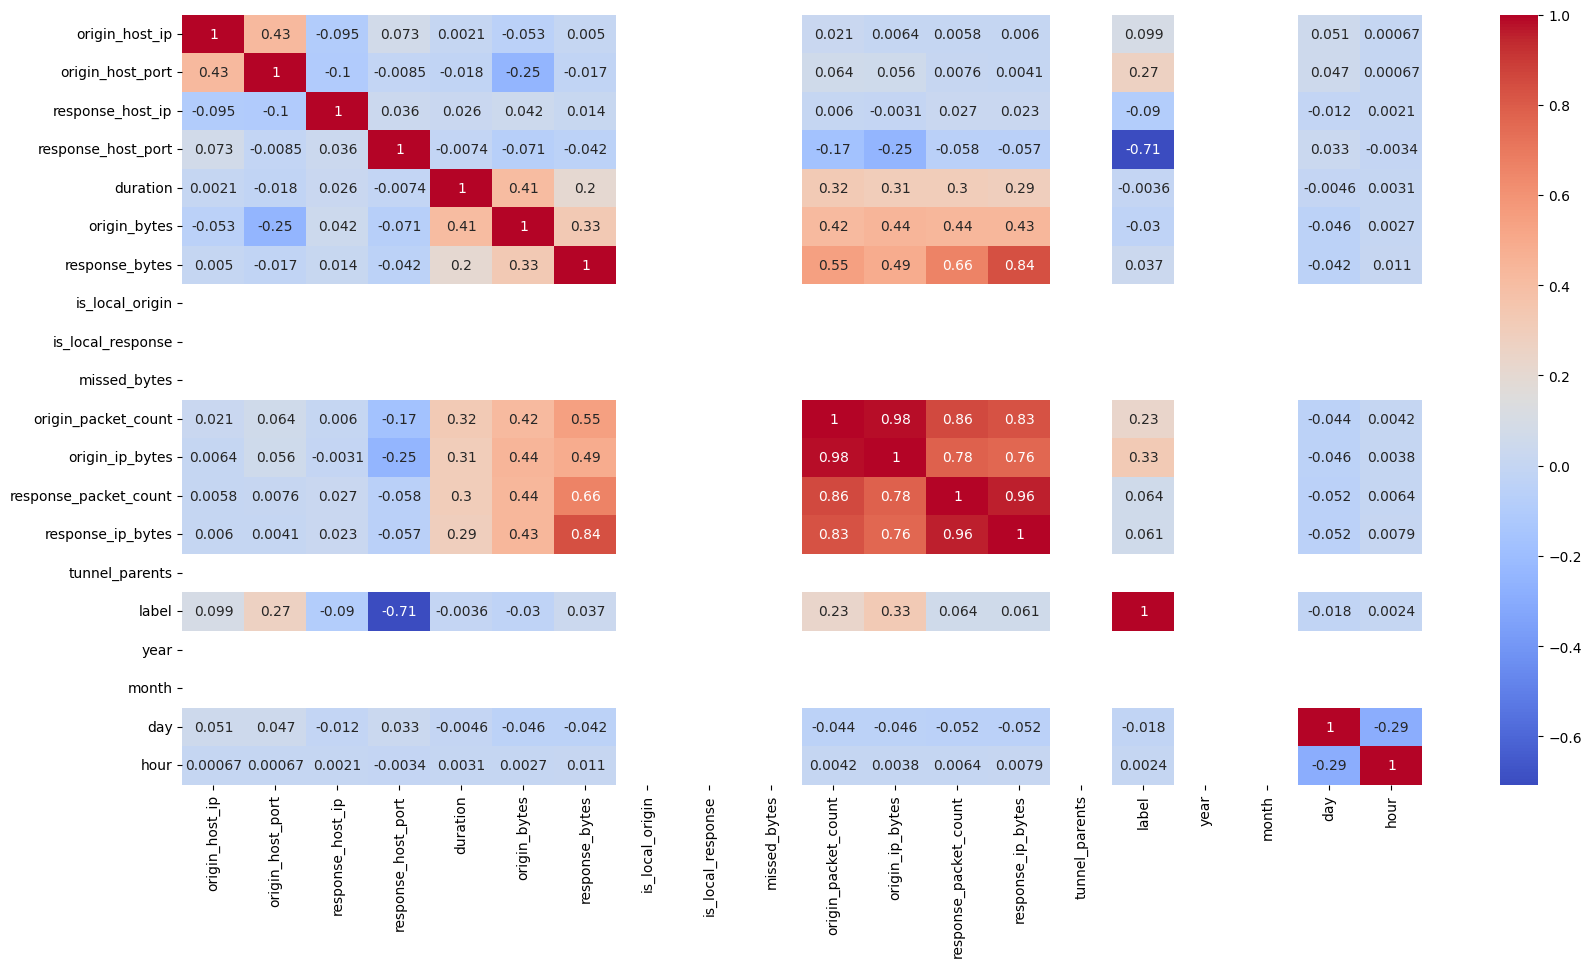

In [ ]:
corr_matrix = numeric_df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
df["label"]

,label
0,1
1,1
2,1
3,1
4,1
...,...
1008742,0
1008743,0
1008744,0
1008745,0


In [ ]:
print(df["label"].shape)
print(df["unique_id"].shape)

(1008747,)
(1008747,)


In [ ]:

le = LabelEncoder()
df['origin_host_ip'] = le.fit_transform(df['origin_host_ip'].astype(str))
df['response_host_ip'] = le.fit_transform(df['response_host_ip'].astype(str))

df.dropna(subset=['label'], inplace=True)

y = df['label']
X = numeric_df.drop(columns=['label'], errors='ignore')

X = X.dropna(axis=1, how='all')

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X = pd.DataFrame(X_imputed, columns=X.columns)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 10 Features (Random Forest):\n", feature_importance_df.head(10))

Top 10 Features (Random Forest):
                 Feature  Importance
9       origin_ip_bytes    0.459648
3    response_host_port    0.323507
1      origin_host_port    0.140138
8   origin_packet_count    0.028276
4              duration    0.016777
2      response_host_ip    0.011065
0        origin_host_ip    0.010059
5          origin_bytes    0.004138
6        response_bytes    0.002743
11    response_ip_bytes    0.001756


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=100, solver='saga')
selector = RFE(model, n_features_to_select=10, step=5)

sampled_X = X.sample(n=100, random_state=42)
sampled_y = y[sampled_X.index]
selector.fit(sampled_X, sampled_y)

selected_rfe_features = X.columns[selector.support_]
print("Selected Features (RFE):", selected_rfe_features)


Selected Features (RFE): Index(['origin_host_ip', 'origin_host_port', 'response_host_ip',
       'response_host_port', 'origin_bytes', 'response_bytes',
       'origin_packet_count', 'origin_ip_bytes', 'response_ip_bytes', 'year'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
mutual_info = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info}).sort_values(by='Mutual Information', ascending=False)
print("Top 10 Features (Mutual Information):\n", mi_df.head(10))

Top 10 Features (Mutual Information):
                 Feature  Mutual Information
3    response_host_port            0.692419
1      origin_host_port            0.601587
9       origin_ip_bytes            0.580933
0        origin_host_ip            0.169629
2      response_host_ip            0.164895
4              duration            0.159940
8   origin_packet_count            0.152531
13                month            0.136738
12                 year            0.086603
14                  day            0.023539


In [ ]:
print(mi_df)

                  Feature  Mutual Information
3      response_host_port            0.692419
1        origin_host_port            0.601587
9         origin_ip_bytes            0.580933
0          origin_host_ip            0.169629
2        response_host_ip            0.164895
4                duration            0.159940
8     origin_packet_count            0.152531
13                  month            0.136738
12                   year            0.086603
14                    day            0.023539
5            origin_bytes            0.011155
11      response_ip_bytes            0.011083
6          response_bytes            0.008741
10  response_packet_count            0.006868
15                   hour            0.004580
7            missed_bytes            0.000000


In [ ]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
print("Explained Variance Ratio (PCA):\n", pca.explained_variance_ratio_)

Explained Variance Ratio (PCA):
 [9.72324929e-01 2.76750704e-02 2.92866335e-10 5.85075517e-11
 1.66017585e-14]


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
selected_lasso_features = X.columns[lasso.coef_ != 0]
print("Selected Features (Lasso):", selected_lasso_features)

Selected Features (Lasso): Index(['origin_host_ip', 'origin_host_port', 'response_host_ip',
       'response_host_port', 'origin_bytes', 'response_bytes',
       'origin_ip_bytes', 'response_ip_bytes'],
      dtype='object')


In [ ]:
features = [
    'origin_host_port',
    'response_host_port',
    'origin_ip_bytes',
    'response_ip_bytes',
    'duration',
    'origin_bytes',
    'response_bytes',
    'origin_packet_count',
    'response_packet_count',
      'response_host_ip',
    'origin_host_ip',
]
len(features)


11

# **Converting Labels To Numeric Data**

# **Test Train Split**

In [ ]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df["label"]
X['duration'].fillna(0, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-35-ebc9ca68456d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['duration'].fillna(0, inplace=True)
<ipython-input-35-ebc9ca68456d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['duration'].fillna(0, inplace=True)


In [ ]:
df

,unique_id,origin_host_ip,origin_host_port,response_host_ip,response_host_port,protocol,service,duration,origin_bytes,response_bytes,...,origin_ip_bytes,response_packet_count,response_ip_bytes,tunnel_parents,label,detailed-label,year,month,day,hour
0,CH98aB3s1kJeq6SFOc,10473,56305.0,10583,23.0,tcp,NaN,NaN,0,0,...,60.0,0.0,0.0,NaN,1,PartOfAHorizontalPortScan,2018,5,9,15
1,C3GBTkINvXNjVGtN5,10473,41101.0,141854,23.0,tcp,NaN,NaN,0,0,...,60.0,0.0,0.0,NaN,1,PartOfAHorizontalPortScan,2018,5,9,15
2,CDe43c1PtgynajGI6,10473,60905.0,195979,23.0,tcp,NaN,2.998796,0,0,...,180.0,0.0,0.0,NaN,1,PartOfAHorizontalPortScan,2018,5,9,15
3,CJaDcG3MZzvf1YVYI4,10473,44301.0,86118,23.0,tcp,NaN,NaN,0,0,...,60.0,0.0,0.0,NaN,1,PartOfAHorizontalPortScan,2018,5,9,15
4,CMBrup3BLXivSp4Avc,10473,50244.0,168177,23.0,tcp,NaN,NaN,0,0,...,60.0,0.0,0.0,NaN,1,PartOfAHorizontalPortScan,2018,5,9,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008742,CUyBg1WA04SBmf3ah,10473,43763.0,298101,64906.0,udp,NaN,NaN,0,0,...,40.0,0.0,0.0,NaN,0,NaN,2018,5,14,7
1008743,CvaIoX2b9VynuYieBf,10473,43763.0,111541,39435.0,udp,NaN,NaN,0,0,...,40.0,0.0,0.0,NaN,0,NaN,2018,5,14,7
1008744,CVHrUzIUN0mW5lQsl,10473,43763.0,497783,26169.0,udp,NaN,NaN,0,0,...,40.0,0.0,0.0,NaN,0,NaN,2018,5,14,7
1008745,CkGlnL2pxzlusrFlLj,10473,43763.0,401876,18241.0,udp,NaN,NaN,0,0,...,40.0,0.0,0.0,NaN,0,NaN,2018,5,14,7


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier

log_reg = LogisticRegression()
pac = PassiveAggressiveClassifier()
ridge_clf = RidgeClassifier()

ensemble_model = VotingClassifier(
    estimators=[
        ('LogisticRegression', log_reg),
        ('PassiveAggressiveClassifier', pac),
        ('RidgeClassifier', ridge_clf)
    ],
    voting='hard'  # Hard voting for speed
)


In [ ]:
models = [
    GaussianNB(),
    LogisticRegression(),
    RidgeClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    IsolationForest(),
    RandomForestClassifier(),
    BaggingClassifier(),
    ensemble_model
]


In [ ]:
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    log_loss, matthews_corrcoef, balanced_accuracy_score, confusion_matrix
)

In [ ]:
results_df = pd.DataFrame(columns=[
    "Model", "Accuracy", "F1 Score", "Precision", "Recall", "AUC-ROC",
    "Log Loss", "MCC", "Balanced Accuracy", "Training Time (s)", "Memory (MB)"
])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    global results_df  # Access the global DataFrame

    model_name = model.__class__.__name__

    start_time = time.time()
    start_memory = psutil.Process().memory_info().rss / 1024 ** 2  # Memory in MB

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Core metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Probability-based metrics
    auc_roc = roc_auc_score(y_test, y_proba[:, 1]) if y_proba is not None else None
    log_loss_value = log_loss(y_test, y_proba) if y_proba is not None else None

    # Resource usage
    train_time = time.time() - start_time
    end_memory = psutil.Process().memory_info().rss / 1024 ** 2
    memory_usage = end_memory - start_memory

    # Append results to DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([{
        "Model": model_name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
        "AUC-ROC": auc_roc,
        "Log Loss": log_loss_value,
        "MCC": mcc,
        "Balanced Accuracy": balanced_accuracy,
        "Training Time (s)": train_time,
        "Memory (MB)": memory_usage
    }])], ignore_index=True)

    print(f"{model_name} evaluated.")

In [ ]:
for i in range(13):
  evaluate_model(models[i], X_train, y_train, X_test, y_test)

<ipython-input-55-9a238f0362ba>:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{


GaussianNB evaluated.
LogisticRegression evaluated.


<ipython-input-55-9a238f0362ba>:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{


RidgeClassifier evaluated.


<ipython-input-55-9a238f0362ba>:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{


Perceptron evaluated.


<ipython-input-55-9a238f0362ba>:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{


PassiveAggressiveClassifier evaluated.
LinearDiscriminantAnalysis evaluated.


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis evaluated.
KNeighborsClassifier evaluated.
DecisionTreeClassifier evaluated.
ExtraTreesClassifier evaluated.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
<ipython-input-55-9a238f0362ba>:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude e

IsolationForest evaluated.
RandomForestClassifier evaluated.
BaggingClassifier evaluated.


In [ ]:
evaluate_model(models[13], X_train, y_train, X_test, y_test)

VotingClassifier evaluated.


<ipython-input-55-9a238f0362ba>:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{


In [ ]:
results_df

,Model,Accuracy,F1 Score,Precision,Recall,AUC-ROC,Log Loss,MCC,Balanced Accuracy,Training Time (s),Memory (MB)
0,GaussianNB,0.904312,0.902737,0.918812,0.904312,0.939121,5.799409e-01,0.820718,0.896939,0.934560,26.070312
1,LogisticRegression,0.981363,0.981339,0.981741,0.981363,0.990935,8.501746e-02,0.962875,0.980214,9.860364,67.675781
2,RidgeClassifier,0.965209,0.965092,0.967001,0.965209,NaN,NaN,0.931697,0.962722,1.261546,3.332031
3,Perceptron,0.934037,0.934122,0.936650,0.934037,NaN,NaN,0.870362,0.936299,3.126947,0.000000
4,PassiveAggressiveClassifier,0.976892,0.976855,0.977440,0.976892,NaN,NaN,0.954037,0.975498,1.524887,0.000000
5,LinearDiscriminantAnalysis,0.965190,0.965072,0.966983,0.965190,0.982799,1.635004e-01,0.931659,0.962700,1.549585,-30.890625
6,QuadraticDiscriminantAnalysis,0.819371,0.810592,0.864857,0.819371,0.988810,2.630979e+00,0.675874,0.805458,2.130536,44.796875
7,KNeighborsClassifier,0.993546,0.993543,0.993622,0.993546,0.997218,9.857926e-02,0.987097,0.993053,702.947659,-24.292969
8,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,1.000000,1.000000,2.994933,-36.683594
9,ExtraTreesClassifier,0.999252,0.999252,0.999252,0.999252,0.999995,2.464718e-03,0.998496,0.999197,68.506288,28.511719


In [ ]:
results_df.to_csv('MalwareDetectionModelsResults.csv', index=False)
from google.colab import files
files.download('MalwareDetectionModelsResults.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
top_3_f1 = results_df.sort_values(by='F1 Score', ascending=False).head(3)['Model']
top_3_accuracy = results_df.sort_values(by='Accuracy', ascending=False).head(3)['Model']
top_3_precision = results_df.sort_values(by='Precision', ascending=False).head(3)['Model']


In [ ]:
print(top_3_f1)
print(top_3_accuracy)
print(top_3_precision)

8     DecisionTreeClassifier
12         BaggingClassifier
11    RandomForestClassifier
Name: Model, dtype: object
8     DecisionTreeClassifier
12         BaggingClassifier
11    RandomForestClassifier
Name: Model, dtype: object
8     DecisionTreeClassifier
12         BaggingClassifier
11    RandomForestClassifier
Name: Model, dtype: object


In [ ]:
results_df

,Model,Accuracy,F1 Score,Precision,Recall,AUC-ROC,Log Loss,MCC,Balanced Accuracy,Training Time (s),Memory (MB)
0,GaussianNB,0.904312,0.902737,0.918812,0.904312,0.939121,5.799409e-01,0.820718,0.896939,0.934560,26.070312
1,LogisticRegression,0.981363,0.981339,0.981741,0.981363,0.990935,8.501746e-02,0.962875,0.980214,9.860364,67.675781
2,RidgeClassifier,0.965209,0.965092,0.967001,0.965209,NaN,NaN,0.931697,0.962722,1.261546,3.332031
3,Perceptron,0.934037,0.934122,0.936650,0.934037,NaN,NaN,0.870362,0.936299,3.126947,0.000000
4,PassiveAggressiveClassifier,0.976892,0.976855,0.977440,0.976892,NaN,NaN,0.954037,0.975498,1.524887,0.000000
5,LinearDiscriminantAnalysis,0.965190,0.965072,0.966983,0.965190,0.982799,1.635004e-01,0.931659,0.962700,1.549585,-30.890625
6,QuadraticDiscriminantAnalysis,0.819371,0.810592,0.864857,0.819371,0.988810,2.630979e+00,0.675874,0.805458,2.130536,44.796875
7,KNeighborsClassifier,0.993546,0.993543,0.993622,0.993546,0.997218,9.857926e-02,0.987097,0.993053,702.947659,-24.292969
8,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,1.000000,1.000000,2.994933,-36.683594
9,ExtraTreesClassifier,0.999252,0.999252,0.999252,0.999252,0.999995,2.464718e-03,0.998496,0.999197,68.506288,28.511719


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
start_memory = psutil.Process().memory_info().rss / 1024 ** 2  # Memory in MB

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1024, verbose=0)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_proba = model.predict(X_test)

f1 = f1_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
log_loss_value = log_loss(y_test, y_proba) if y_proba is not None else None

train_time = time.time() - start_time
end_memory = psutil.Process().memory_info().rss / 1024 ** 2
memory_usage = end_memory - start_memory

neural_net_results = pd.DataFrame([{
    "Model": "Neural Network",
    "Accuracy": accuracy,
    "F1 Score": f1,
    "Precision": precision,
    "Recall": recall,
    "AUC-ROC": auc_roc,
    "Log Loss": log_loss_value,
    "MCC": mcc,
    "Balanced Accuracy": balanced_accuracy,
    "Training Time (s)": train_time,
    "Memory (MB)": memory_usage
}])

results_df = pd.concat([results_df, neural_net_results], ignore_index=True)

print("Sequential model evaluated.")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6305/6305 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
6305/6305 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
Sequential model evaluated.


In [ ]:
results_df

,Model,Accuracy,F1 Score,Precision,Recall,AUC-ROC,Log Loss,MCC,Balanced Accuracy,Training Time (s),Memory (MB)
0,GaussianNB,0.904312,0.902737,0.918812,0.904312,0.939121,5.799409e-01,0.820718,0.896939,0.934560,26.070312
1,LogisticRegression,0.981363,0.981339,0.981741,0.981363,0.990935,8.501746e-02,0.962875,0.980214,9.860364,67.675781
2,RidgeClassifier,0.965209,0.965092,0.967001,0.965209,NaN,NaN,0.931697,0.962722,1.261546,3.332031
3,Perceptron,0.934037,0.934122,0.936650,0.934037,NaN,NaN,0.870362,0.936299,3.126947,0.000000
4,PassiveAggressiveClassifier,0.976892,0.976855,0.977440,0.976892,NaN,NaN,0.954037,0.975498,1.524887,0.000000
5,LinearDiscriminantAnalysis,0.965190,0.965072,0.966983,0.965190,0.982799,1.635004e-01,0.931659,0.962700,1.549585,-30.890625
6,QuadraticDiscriminantAnalysis,0.819371,0.810592,0.864857,0.819371,0.988810,2.630979e+00,0.675874,0.805458,2.130536,44.796875
7,KNeighborsClassifier,0.993546,0.993543,0.993622,0.993546,0.997218,9.857926e-02,0.987097,0.993053,702.947659,-24.292969
8,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,1.000000,1.000000,2.994933,-36.683594
9,ExtraTreesClassifier,0.999252,0.999252,0.999252,0.999252,0.999995,2.464718e-03,0.998496,0.999197,68.506288,28.511719


In [ ]:
# results_df.to_csv('MalwareDetectionModelsResults.csv', index=False)
# from google.colab import files
# files.download('MalwareDetectionModelsResults.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>